<a href="https://colab.research.google.com/github/rakimfanny/mycodes/blob/main/DS_C42_NLP_DL_Copy1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt 
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [ ]:
df = pd.read_csv('Electric_Production.csv')
df.head()

,DATE,IPG2211A2N
0,1/1/1985,72.5052
1,2/1/1985,70.6720
2,3/1/1985,62.4502
3,4/1/1985,57.4714
4,5/1/1985,55.3151


Before we may apply ARIMA modelling on top the following time series data, we have to make the following changes:
1. The index of the dataframe is the time component
2. The index of the dataframe should be in pands datetime format.

In [ ]:
df['DATE'] = pd.to_datetime(df['DATE'])

In [ ]:
df.head()

,DATE,IPG2211A2N
0,1985-01-01,72.5052
1,1985-02-01,70.6720
2,1985-03-01,62.4502
3,1985-04-01,57.4714
4,1985-05-01,55.3151


In [ ]:
df.dtypes

DATE          datetime64[ns]
IPG2211A2N           float64
dtype: object

In [ ]:
df.set_index('DATE', inplace = True)

In [ ]:
df.head()

,IPG2211A2N
DATE,
1985-01-01,72.5052
1985-02-01,70.6720
1985-03-01,62.4502
1985-04-01,57.4714
1985-05-01,55.3151


In [ ]:
df.columns = ['Energy Production']

In [ ]:
df.head()

,Energy Production
DATE,
1985-01-01,72.5052
1985-02-01,70.6720
1985-03-01,62.4502
1985-04-01,57.4714
1985-05-01,55.3151


<AxesSubplot:xlabel='DATE'>

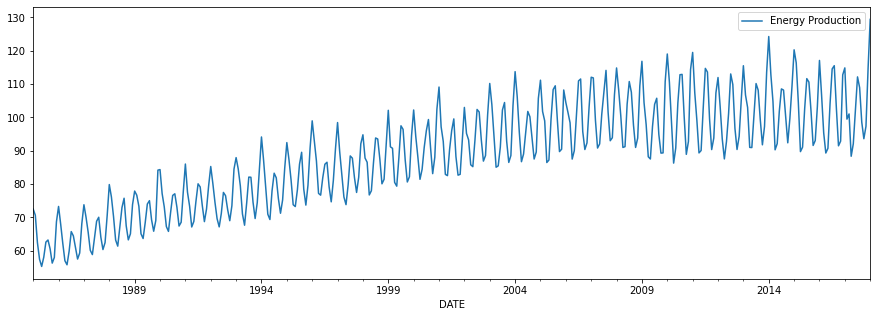

In [ ]:
df.plot(figsize = (15,5))

## Stationarity Check

In [ ]:
import statsmodels.tsa.stattools as ts

adf_test = ts.adfuller(df)
print('P-Value: ', adf_test[1])

P-Value:  0.18621469116586947


Since the p-value>0.05, is not a stationary time series

## Differencing

In [ ]:
df.head()

,Energy Production
DATE,
1985-01-01,72.5052
1985-02-01,70.6720
1985-03-01,62.4502
1985-04-01,57.4714
1985-05-01,55.3151


In [ ]:
70.8479-72.6803

-1.832400000000007

In [ ]:
df.diff()

,Energy Production
DATE,
1985-01-01,NaN
1985-02-01,-1.8332
1985-03-01,-8.2218
1985-04-01,-4.9788
1985-05-01,-2.1563
...,...
2017-09-01,-10.3158
2017-10-01,-5.0017
2017-11-01,3.7222


In [ ]:
import statsmodels.tsa.stattools as ts

adf_test = ts.adfuller(df.diff().dropna())
print('P-Value: {0:0.20f}'.format(adf_test[1]))

P-Value: 0.00000000040777865655


<AxesSubplot:xlabel='DATE'>

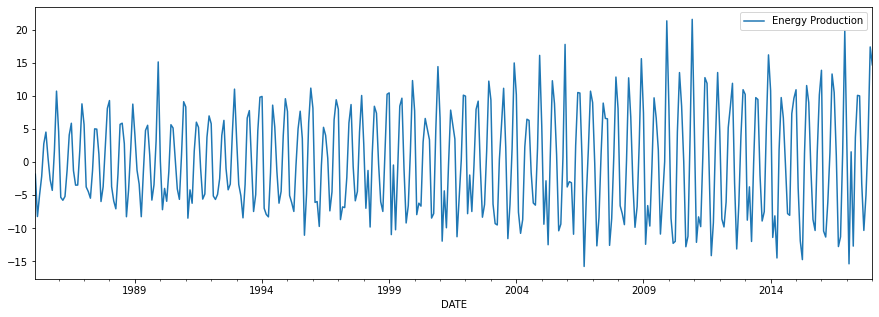

In [ ]:
df.diff().dropna().plot(figsize = (15,5))

Now the time series is stationary

- Number of level of differencing required: d: 1

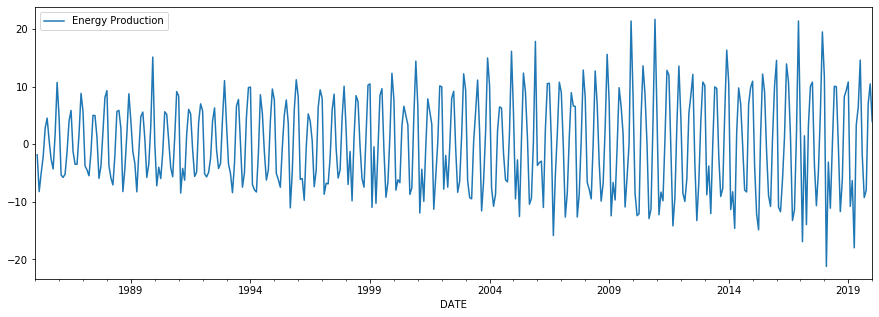

In [ ]:
df.diff().plot(figsize = (15,5))

- d = 1

## ACF and PACF plot

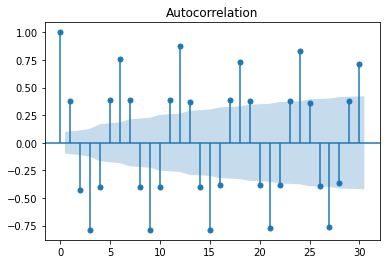

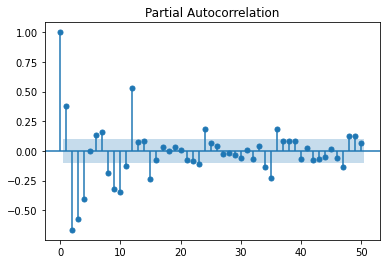

In [ ]:
import statsmodels.graphics.tsaplots as tsa

tsa.plot_acf(df.diff().dropna(), lags =30)
tsa.plot_pacf(df.diff().dropna(), lags =50)
plt.show()

- p :12
- d :1
- q :0

## ARIMA

In [ ]:
from statsmodels.tsa.arima_model import ARIMA

model = ARIMA(df, order = (12,1,0))
result = model.fit()

c:\users\akash\appdata\local\programs\python\python38\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
c:\users\akash\appdata\local\programs\python\python38\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
c:\users\akash\appdata\local\programs\python\python38\lib\site-packages\statsmodels\base\model.py:547: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warnings.warn('Inverting hessian failed, no bse or cov_params '
c:\users\akash\appdata\local\programs\python\python38\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed 

In [ ]:
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARIMA Model Results                              
===============================================================================
Dep. Variable:     D.Energy Production   No. Observations:                  396
Model:                 ARIMA(12, 1, 0)   Log Likelihood                -962.551
Method:                        css-mle   S.D. of innovations     3788133350.200
Date:                 Sat, 19 Nov 2022   AIC                           1953.102
Time:                         12:44:27   BIC                           2008.842
Sample:                     02-01-1985   HQIC                          1975.185
                          - 01-01-2018                                         
==============================================================================================
                                 coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const                          0.1112      0.027      4.100      0.000       0.058       0.164
ar.L1.D.Energy Production     -0.3757      0.000  -2448.843      0.000      -0.376      -0.375
ar.L2.D.Energy Production     -0.4816      0.001   -578.195      0.000      -0.483      -0.480
ar.L3.D.Energy Production     -0.4325      0.001   -609.550      0.000      -0.434      -0.431
ar.L4.D.Energy Production     -0.4776      0.001   -608.364      0.000      -0.479      -0.476
ar.L5.D.Energy Production     -0.4093        nan        nan        nan         nan         nan
ar.L6.D.Energy Production     -0.3764      0.000  -3085.105      0.000      -0.377      -0.376
ar.L7.D.Energy Production     -0.3098      0.000  -1147.948      0.000      -0.310      -0.309
ar.L8.D.Energy Production     -0.3814      0.001   -310.909      0.000      -0.384      -0.379
ar.L9.D.Energy Production     -0.4370      0.000  -3712.304      0.000      -0.437      -0.437
ar.L10.D.Energy Production    -0.3715      0.000  -1639.523      0.000      -0.372      -0.371
ar.L11.D.Energy Production    -0.2798      0.000   -983.252      0.000      -0.280      -0.279
ar.L12.D.Energy Production     0.3423        nan        nan        nan         nan         nan
                                    Roots                                     
==============================================================================
                   Real          Imaginary           Modulus         Frequency
------------------------------------------------------------------------------
AR.1            -1.0664           -0.0000j            1.0664           -0.5000
AR.2            -0.8979           -0.5335j            1.0444           -0.4147
AR.3            -0.8979           +0.5335j            1.0444            0.4147
AR.4            -0.5186           -0.9136j            1.0506           -0.3322
AR.5            -0.5186           +0.9136j            1.0506            0.3322
AR.6            -0.0201           -1.0418j            1.0419           -0.2531
AR.7            -0.0201           +1.0418j            1.0419            0.2531
AR.8             0.4990           -0.8666j            1.0000           -0.1668
AR.9             0.4990           +0.8666j            1.0000            0.1668
AR.10            0.8913           -0.5158j            1.0297           -0.0835
AR.11            0.8913           +0.5158j            1.0297            0.0835
AR.12            1.9766           -0.0000j            1.9766           -0.0000
------------------------------------------------------------------------------
"""

In [ ]:
result.predict()

1985-02-01     0.099928
1985-03-01    -0.556129
1985-04-01    -3.265643
1985-05-01     2.599135
1985-06-01     7.397513
                ...    
2019-09-01   -10.006587
2019-10-01    -5.769375
2019-11-01     7.279231
2019-12-01    10.434664
2020-01-01     9.986809
Freq: MS, Length: 420, dtype: float64

In [ ]:
y_pred = result.predict(typ = 'levels')

In [ ]:
y_pred

1985-02-01     72.616358
1985-03-01     69.813222
1985-04-01     56.193360
1985-05-01     59.941012
1985-06-01     63.421717
                 ...    
2017-09-01     97.900677
2017-10-01     91.543275
2017-11-01     96.304506
2017-12-01    111.951445
2018-01-01    117.032572
Freq: MS, Length: 396, dtype: float64

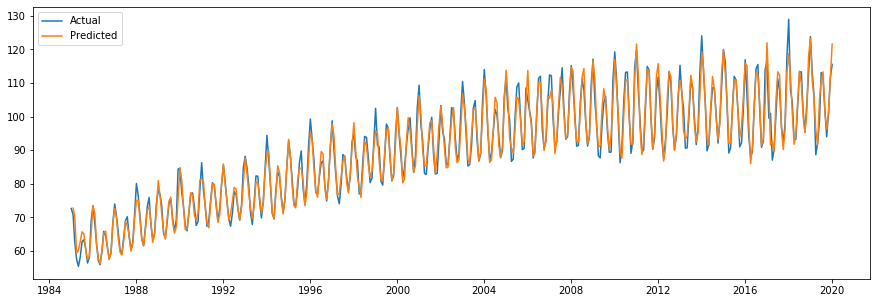

In [ ]:
plt.figure(figsize = (15,5))
plt.plot(df, label = 'Actual')
plt.plot(y_pred, label = 'Predicted')
plt.legend()
plt.show()

In [ ]:
result.predict(typ = 'levels', start = '2020-01-01', end = '2020-06-01')

2020-01-01    121.551209
2020-02-01    110.877434
2020-03-01    104.138172
2020-04-01     90.329942
2020-05-01     93.185300
2020-06-01    102.174487
Freq: MS, dtype: float64

## MAPE

In [ ]:
def MAPE(y_a, y_p):
    return np.mean(np.abs((y_a-y_p)/y_a))*100

In [ ]:
MAPE(df['Energy Production'], y_pred)

2.2232145741766716